# Experiment: Varying N in top-N DDA fragmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sys
from collections import defaultdict

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

### Useful functions

Performance is calculated by the proportion of original input peaks that got fragmented for varying values of `N` and `rt_tol`. More is better.

In [5]:
def find_chem(to_find, chem_list):
    for chem in chem_list:
        if chem.max_intensity == to_find.max_intensity and \
            chem.rt == to_find.rt and \
            chem.chromatogram == to_find.chromatogram:
            return chem
    return None

In [6]:
def count_fragmented(chem, fragmented_chems):
    peaks = fragmented_chems[chem]
    ms_counts = defaultdict(int)
    for p in peaks:
        ms_counts[p.ms_level] += 1
    return ms_counts

In [7]:
def get_total_peaks(controller, ms_level):
    num_peaks = [scan.num_peaks for scan in controller.scans[ms_level]]
    return sum(num_peaks)

def get_num_fragmented_chems(controller, dataset):
    fragmented_chems = controller.mass_spec.chemicals_to_peaks
    total = 0
    for i in range(len(dataset)):
        # if i % 1000 == 0:
        #     print(i, '/', len(dataset))
        chem = dataset[i]
        found = find_chem(chem, fragmented_chems)
        if found:
            ms_counts = count_fragmented(found, fragmented_chems)
            if ms_counts[2] > 0:
                total += 1
    prop = float(total) / len(dataset)
    return prop

def compute_performance(controller, dataset):
    total_ms2_peaks = get_total_peaks(controller, 2)
    props = get_num_fragmented_chems(controller, dataset)
    print('total_ms2_peaks %d props %.4f' % (total_ms2_peaks, props))    
    return total_ms2_peaks, props

In [8]:
def load_controller(N, rt_tol):
    analysis_name = 'experiment_N_%d_rttol_%d' % (N, rt_tol)    
    pickle_in = '%s/%s.p' % (results_dir, analysis_name) 
    print('Loading %s' % analysis_name)                    
    try:
        controller = load_obj(pickle_in)
    except FileNotFoundError:
        controller = None
    return controller

### Load experiment results

In [9]:
results_dir = '../models/dda_results'

In [10]:
dataset = load_obj('%s/dataset.p' % results_dir)

In [11]:
Ns = list(range(2, 51, 2)) # top-N DDA fragmentation
rt_tols = list(range(5, 31, 5)) # the rt window around a selected precursor ion to prevent it from fragmented multiple times

### Compute performance

In [12]:
N = 10
total_ms2_peaks_arr = []
props_arr = []
for rt_tol in rt_tols:
    controller = load_controller(N, rt_tol)
    if controller is not None:
        total_ms2_peaks, props = compute_performance(controller, dataset)
    else:
        total_ms2_peaks = 0
        props = 0
    total_ms2_peaks_arr.append(total_ms2_peaks)
    props_arr.append(props)

Loading experiment_N_10_rttol_5
total_ms2_peaks 50517 props 0.1317
Loading experiment_N_10_rttol_10
total_ms2_peaks 31094 props 0.1249
Loading experiment_N_10_rttol_15
total_ms2_peaks 23864 props 0.1155
Loading experiment_N_10_rttol_20
total_ms2_peaks 20477 props 0.1066
Loading experiment_N_10_rttol_25
total_ms2_peaks 18072 props 0.0983
Loading experiment_N_10_rttol_30
total_ms2_peaks 16814 props 0.0936


In [13]:
%matplotlib inline

Total ms2 peaks for N = 10 and varying rt_tols

Text(0.5, 1.0, 'N=10')

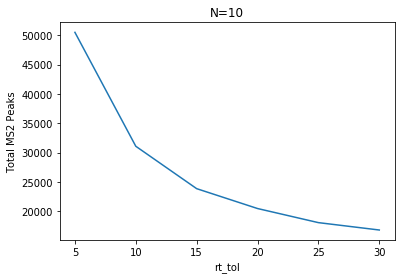

In [14]:
plt.plot(rt_tols, total_ms2_peaks_arr)
plt.xlabel('rt_tol')
plt.ylabel('Total MS2 Peaks')
plt.title('N=%d' % N)

Proportion of the input ms1 peaks that got fragmented for N = 10 and varying rt_tols

Text(0.5, 1.0, 'N=10')

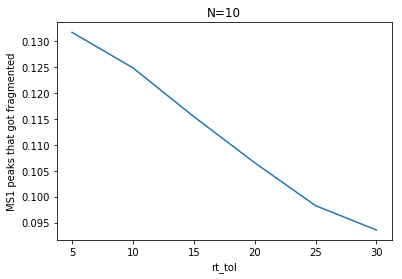

In [15]:
plt.plot(rt_tols, props_arr)
plt.xlabel('rt_tol')
plt.ylabel('MS1 peaks that got fragmented')
plt.title('N=%d' % N)

In [16]:
rt_tol = 5
total_ms2_peaks_arr = []
props_arr = []
for N in Ns:
    controller = load_controller(N, rt_tol)
    if controller is not None:
        total_ms2_peaks, props = compute_performance(controller, dataset)
    else:
        total_ms2_peaks = 0
        props = 0
    total_ms2_peaks_arr.append(total_ms2_peaks)
    props_arr.append(props)

Loading experiment_N_2_rttol_5
total_ms2_peaks 13243 props 0.0387
Loading experiment_N_4_rttol_5
total_ms2_peaks 24720 props 0.0669
Loading experiment_N_6_rttol_5
total_ms2_peaks 33568 props 0.0885
Loading experiment_N_8_rttol_5
total_ms2_peaks 42596 props 0.1107
Loading experiment_N_10_rttol_5
total_ms2_peaks 50517 props 0.1317
Loading experiment_N_12_rttol_5
total_ms2_peaks 57231 props 0.1469
Loading experiment_N_14_rttol_5
total_ms2_peaks 62923 props 0.1602
Loading experiment_N_16_rttol_5
total_ms2_peaks 67700 props 0.1718
Loading experiment_N_18_rttol_5
total_ms2_peaks 71751 props 0.1810
Loading experiment_N_20_rttol_5
total_ms2_peaks 76842 props 0.1922
Loading experiment_N_22_rttol_5
total_ms2_peaks 80383 props 0.2020
Loading experiment_N_24_rttol_5
total_ms2_peaks 81217 props 0.2054
Loading experiment_N_26_rttol_5
total_ms2_peaks 82817 props 0.2091
Loading experiment_N_28_rttol_5
total_ms2_peaks 84241 props 0.2135
Loading experiment_N_30_rttol_5
total_ms2_peaks 83865 props 0.2169

Total ms2 peaks for rt_tol = 5 and varying Ns

Text(0.5, 1.0, 'rt_tol=5')

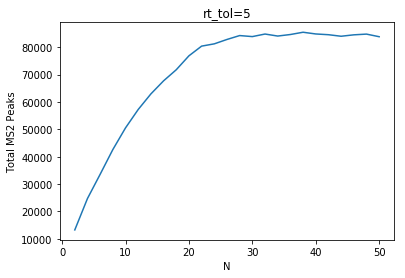

In [17]:
plt.plot(Ns, total_ms2_peaks_arr)
plt.xlabel('N')
plt.ylabel('Total MS2 Peaks')
plt.title('rt_tol=5')

Proportion of the input ms1 peaks that got fragmented for rt_tol = 5 and varying Ns

Text(0.5, 1.0, 'rt_tol=5')

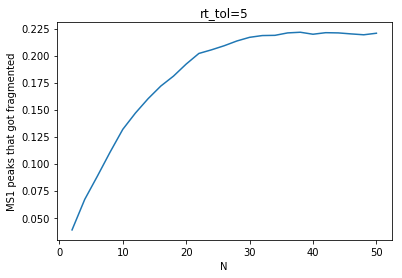

In [18]:
plt.plot(Ns, props_arr)
plt.xlabel('N')
plt.ylabel('MS1 peaks that got fragmented')
plt.title('rt_tol=5')

### Compute performance for varying Ns and rt_tols

In [19]:
X, Y = np.meshgrid(Ns, rt_tols)
Z_total_ms2_peaks = np.zeros_like(X)
Z_num_fragmented_chems = np.zeros_like(X).astype(float)

In [20]:
for j in range(X.shape[1]):
    for i in range(X.shape[0]):    
        if Z_total_ms2_peaks[i, j] == 0:
            N = X[i, j]
            rt_tol = Y[i, j]            
            analysis_name = 'experiment_N_%d_rttol_%d' % (N, rt_tol)    
            pickle_in = '%s/%s.p' % (results_dir, analysis_name) 

            print('Loading %s' % analysis_name)                    
            try:
                controller = load_obj(pickle_in)
            except FileNotFoundError:
                controller = None

            # compute performance
            if controller is not None:
                total_ms2_peaks, props = compute_performance(controller, dataset)
                Z_total_ms2_peaks[i, j] = total_ms2_peaks
                Z_num_fragmented_chems[i, j] = props

Loading experiment_N_2_rttol_5
total_ms2_peaks 13243 props 0.0387
Loading experiment_N_2_rttol_10
total_ms2_peaks 8339 props 0.0362
Loading experiment_N_2_rttol_15
total_ms2_peaks 6409 props 0.0329
Loading experiment_N_2_rttol_20
total_ms2_peaks 5606 props 0.0310
Loading experiment_N_2_rttol_25
total_ms2_peaks 5176 props 0.0295
Loading experiment_N_2_rttol_30
total_ms2_peaks 4902 props 0.0281
Loading experiment_N_4_rttol_5
total_ms2_peaks 24720 props 0.0669
Loading experiment_N_4_rttol_10
total_ms2_peaks 14817 props 0.0624
Loading experiment_N_4_rttol_15
total_ms2_peaks 11421 props 0.0582
Loading experiment_N_4_rttol_20
total_ms2_peaks 9941 props 0.0535
Loading experiment_N_4_rttol_25
total_ms2_peaks 9174 props 0.0501
Loading experiment_N_4_rttol_30
total_ms2_peaks 8307 props 0.0475
Loading experiment_N_6_rttol_5
total_ms2_peaks 33568 props 0.0885
Loading experiment_N_6_rttol_10
total_ms2_peaks 19704 props 0.0825
Loading experiment_N_6_rttol_15
total_ms2_peaks 15419 props 0.0754
Loadin

Loading experiment_N_42_rttol_10
total_ms2_peaks 55408 props 0.2153
Loading experiment_N_42_rttol_15
total_ms2_peaks 43274 props 0.2016
Loading experiment_N_42_rttol_20
total_ms2_peaks 37163 props 0.1864
Loading experiment_N_42_rttol_25
total_ms2_peaks 33162 props 0.1726
Loading experiment_N_42_rttol_30
total_ms2_peaks 31017 props 0.1627
Loading experiment_N_44_rttol_5
total_ms2_peaks 83990 props 0.2210
Loading experiment_N_44_rttol_10
total_ms2_peaks 55525 props 0.2162
Loading experiment_N_44_rttol_15
total_ms2_peaks 43214 props 0.2006
Loading experiment_N_44_rttol_20
total_ms2_peaks 37017 props 0.1860
Loading experiment_N_44_rttol_25
total_ms2_peaks 33306 props 0.1741
Loading experiment_N_44_rttol_30
total_ms2_peaks 31206 props 0.1651
Loading experiment_N_46_rttol_5
total_ms2_peaks 84507 props 0.2201
Loading experiment_N_46_rttol_10
total_ms2_peaks 55239 props 0.2164
Loading experiment_N_46_rttol_15
total_ms2_peaks 43397 props 0.2023
Loading experiment_N_46_rttol_20
total_ms2_peaks 3

### Make plot

In [57]:
plot_data = {
    'X': X,
    'Y': Y,
    'Z_total_ms2_peaks': Z_total_ms2_peaks,
    'Z_num_fragmented_chems': Z_num_fragmented_chems
}

In [58]:
save_obj(plot_data, results_dir + '/plot_data.p')

In [46]:
def make_plot(X, Y, Z, xlabel, ylabel, zlabel, title):
    # Plot the surface.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    # ax.set_zlim(-1.01, 1.01)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)    
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


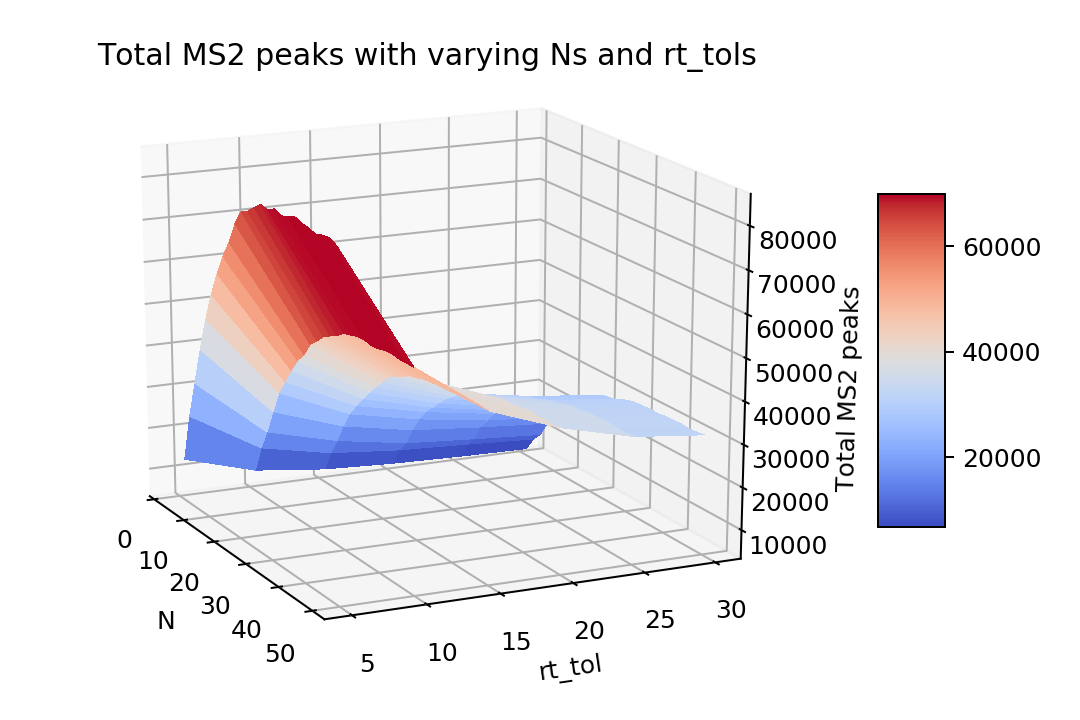

In [48]:
make_plot(X, Y, Z_total_ms2_peaks, 'N', 'rt_tol', 'Total MS2 peaks', 'Total MS2 peaks with varying Ns and rt_tols')

<IPython.core.display.Javascript object>


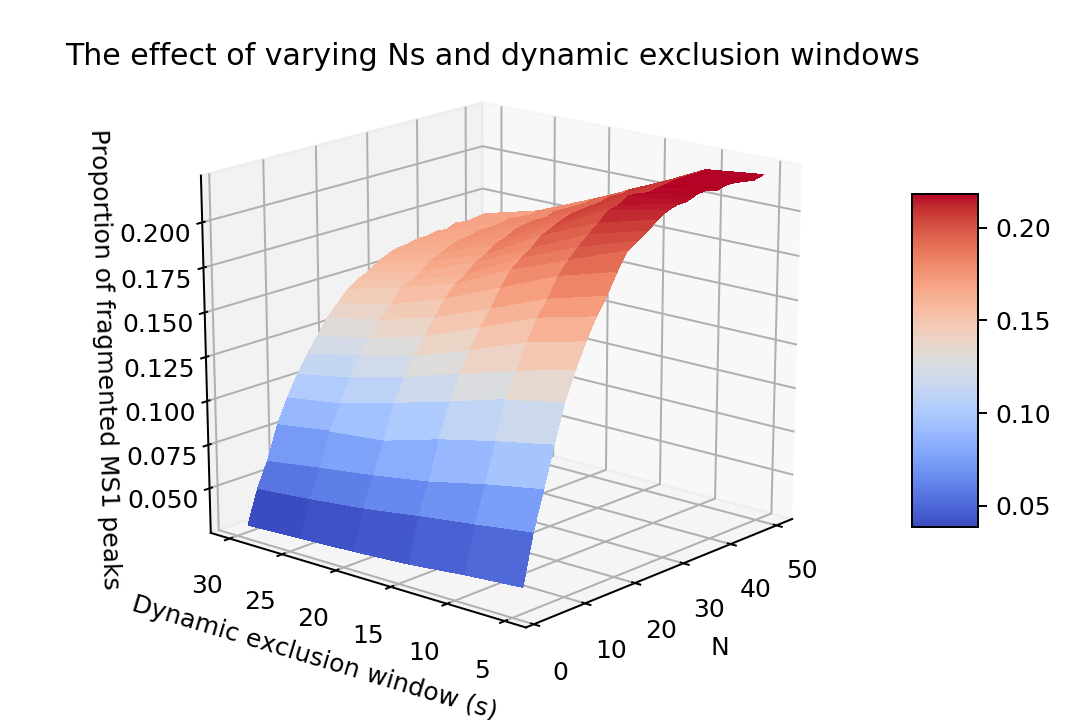

In [53]:
make_plot(X, Y, Z_num_fragmented_chems, 'N', 'Dynamic exclusion window (s)', 'Proportion of fragmented MS1 peaks', 'The effect of varying Ns and dynamic exclusion windows')

In [31]:
%matplotlib inline

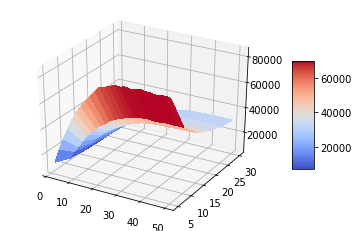

In [32]:
make_plot(X, Y, Z_total_ms2_peaks)

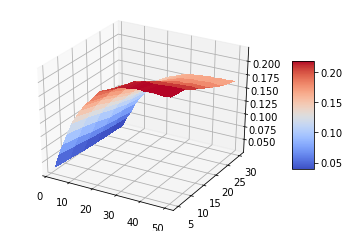

In [33]:
make_plot(X, Y, Z_num_fragmented_chems)